<a href="https://colab.research.google.com/github/vhrique/anne2024/blob/main/01_Fundamentos_de_Redes_Neurais_Artificiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos de Redes Neurais Artificiais

## Ferramentas Utilizadas Nesta Aula

* Numpy: Pacote com funções para realizar cálculos vetoriais e matriciais
* Pyplot: Pacote com funções para criar gráficos
* Scikit-Learn: Pacote com algoritmos de Machine Learning e ferramentas auxiliares
  * classification_report: Função que cria relatório com métricas de classificação
  * ConfusionMatrixDisplay: Classe que auxilia a criar o gráfico da matriz de confusão
  * make_classification: Função que cria um problema simples de classificação
  * make_moons: Função que cria um problema não-linear de classificação

In [53]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.datasets import make_classification, make_moons

# _Perceptron_

## Código do _Perceptron_ em Python

In [2]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.predict(X[i])
                if y_pred != y[i]:
                    self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                    self.bias += self.learning_rate * (y[i] - y_pred)

## Exemplo de Aplicação - Problema Linear

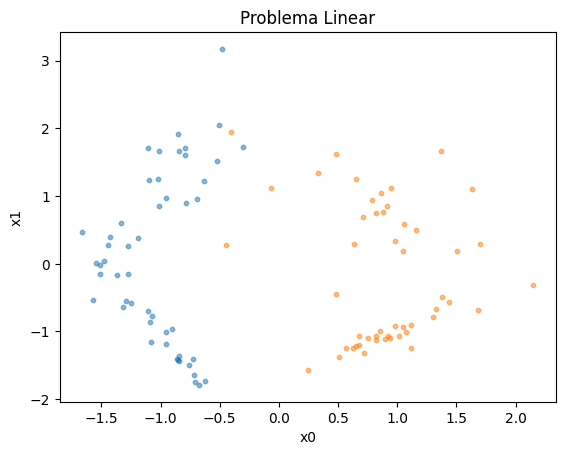

In [83]:
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2,
    n_informative=2, n_redundant=0, n_repeated=0,
    random_state=1
)

plt.scatter(X[y==0,0], X[y==0,1], s=10, alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], s=10, alpha=0.5)
plt.title('Problema Linear')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [85]:
model = Perceptron(input_size=X.shape[1])
model.fit(X, y)
y_pred = model.predict(X)

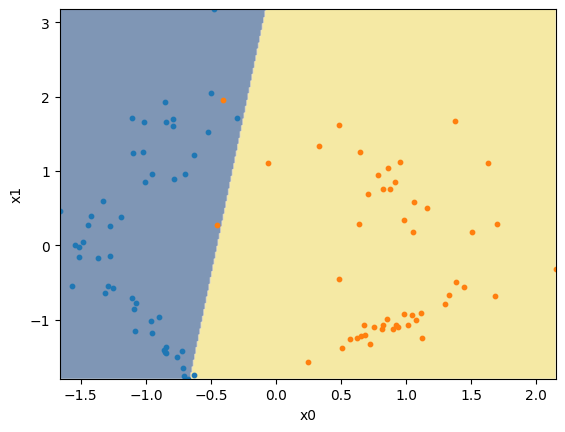

In [86]:
def plot_decision_boundary(model, X, y):
    xx, yy = np.meshgrid(np.arange(X[:,0].min(), X[:,0].max(), 0.01),
                         np.arange(X[:,1].min(), X[:,1].max(), 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)

    plt.scatter(X[y==0,0], X[y==0,1], s=10)
    plt.scatter(X[y==1,0], X[y==1,1], s=10)
    plt.xlim(X[:,0].min(), X[:,0].max())
    plt.ylim(X[:,1].min(), X[:,1].max())
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.show()

plot_decision_boundary(model, X, y)

## Limitação: Problemas Não-Lineares

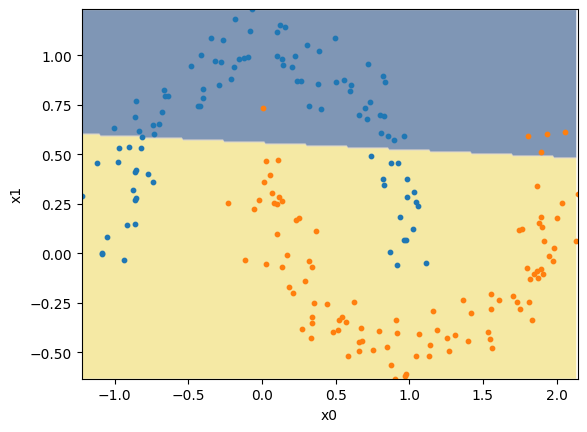

In [87]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

model = Perceptron(input_size=X.shape[1])
model.fit(X, y)
y_pred = model.predict(X)

plot_decision_boundary(model, X, y)

# Perceptron Multicamadas

# Backpropagation

# Exercícios

# Referências